In [2]:
import numpy as np
import matplotlib.pyplot as plt

This is a game with 2 players.
Each player plays 0 or 1.
Aim is to produce a different number than the other player.

In [3]:
default = 0
opposite_num_dict = {0: 1,
                     1: 0}
bool_to_num_dict = {True: default,
                    False: opposite_num_dict[default]}

class player:
    '''
    player class of our game
    '''
    def __init__(self, prob=None):
        self._prob = 0.5    #initial probability of producting the default value
        if prob != None:
            self._prob = prob
        self._log = [] #keep track of all the probabilities generated(mainly for plotting)
        
    def play_a_move(self):
        #return [default] with probability = self._prob
        #    and [opposite] with probability = (1 - self._prob)
        return bool_to_num_dict[(np.random.random() < self._prob)]
    
    def update_probability(self, prob, log=True):
        #update self._prob and add to log list
        if log:
            self._log.append(prob)
        self._prob=prob
        if self._prob < 0 or self._prob > 1:
            raise Exception("Probability out of range: ", self._prob)
            
    def probability_info(self):
        #print statistical info
        listy = np.array(self._log)
        length = len(listy)
        mean = np.sum(listy)/length
        SD = np.sum(np.square(listy-mean))/length
        print("probability: {}".format(self._prob))
        print("mean: {}".format(mean))
        print("Standard Deviation: {}".format(SD))
    

ERROR:  ('Probability out of range: ', 1.000099999999945)  at iteration  22504 for p1
Player 1 information:-
probability: 1.000099999999945
mean: 0.6099835021771851
Standard Deviation: 0.01573386666507955

Player 2 information:-
probability: 0.00280000000003875
mean: 0.3916402577205179
Standard Deviation: 0.0156889571529187



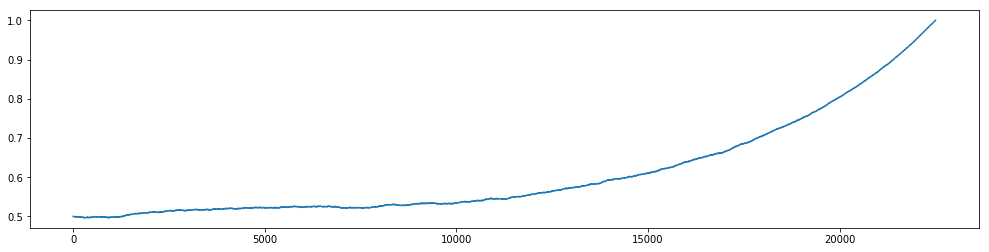

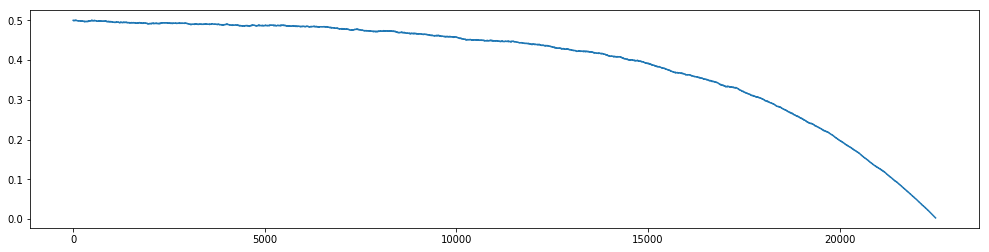

CPU times: user 503 ms, sys: 404 ms, total: 908 ms
Wall time: 386 ms


In [5]:
%%time

#declare 2 players
player1 = player()
player2 = player()

#manipulate starting probabilities
player1.update_probability(0.5)
player2.update_probability(0.5)

#main AI loop
iterations = 1000000
reward = 0.0001 #constant reward value
#reward function is defined as follows
# move1  move2  prob1(0)  prob2(0)
#   0      0       -         -
#   0      1       +         -
#   1      0       -         +
#   1      1       +         +
#Notice: 
#move1 -> prob2(0) with 0 = - and 1 = +
#move2 -> prob1(0) with 0 = - and 1 = +
changer_dict = {0: -1,
               1: +1}

for i in range(iterations):
    #each player plays a move
    move1 = player1.play_a_move()
    move2 = player2.play_a_move()
    
    #assuming player1 doesn't have a optimal strategy if he loses
    #and he does have an optimal strategy if he wins
#     print(i, move1, move2, player1.prob, changer_dict[move2]*reward)
    try:
        player1.update_probability(player1._prob + changer_dict[move2]*reward)
    except Exception as E:
        print("ERROR: ", E, " at iteration ", i, "for p1")
        break
    try:
        player2.update_probability(player2._prob + changer_dict[move1]*reward)
    except Exception as E:
        print("ERROR: ", E, " at iteration ", i, "for p2")
        break
    
print("Player 1 information:-")
player1.probability_info()
print()

print("Player 2 information:-")
player2.probability_info()
print()

#plot probability distribution
%matplotlib inline
#p1
plt.rcParams['figure.figsize'] = (17, 4)
plt.plot(list(range(len(player1._log))), np.array(player1._log))
plt.show()
#p2
plt.rcParams['figure.figsize'] = (17, 4)
plt.plot(list(range(len(player2._log))), player2._log)
plt.show()

Observations:
1) Player2 probability is kept constant.

    player2.prob ---> player1.prob
         0.5              0.5
         
    For all other values of player2.prob, player1.prob goes out of range (0, 1). AND! IT GOES OUT OF BOUND IN A VERY SMALL FRACTION OF ITERATION VALUES! 
        - eg. for player2.prob = 0.51, it always plummets around 250000
          (when iterations=1000000, player1.prob=0.5 and reward = 0.0001)
        - this is (quite) symmetric about 0.5. 
           ie. we get similar results as above example for player2.prob = 0.49
        - Another crazy thing is, for prob2 > 0.5, prob1 always plummets and for prob2 < 0.5, it always skyrockets. 
          Speed(rate of change) increases as |prob2 - 0.5| increases.
        - Good thing is, there is atleast some semblence of randomness remaining, as the graph is never monotonic.
        - Again, for prob2 = 0.5 is the only point where it works well.
        
    All these make sense though. For prob2 > 0.5, it'll produce more 0's than 1's. Hence, optimUM strategy is to always produce 1's for player1. That is, in fact, what it slowly learns, which is what causes prob1 to become 0. 

2) P2 prob is also allowed to be AI controlled.
    Both prob1 and prob2 move in opposite directions (almost in an exponential fashion). It is not necessary for
    either to move in a particular direction individually, but relatively. (Both go for a mutual win!)
    
    Player1.mean + Player2.mean = 1 (approx)
    Player1.SD   = Player2.SD       (approx)   